In [1]:
import pickle 
import json
import pandas as pd
import numpy as np
import torch

pd.set_option('display.notebook_repr_html',False)
# 读取xls（绝对路径）
data=pd.read_excel(io='./202005.xls',sheet_name = "温度监测")
'''with open("collected_data.pkl",'rb') as f:
    data= pickle.load(f)'''

'''with open("data.json",'rb') as f:
    data=json.load(f)'''

'with open("data.json",\'rb\') as f:\n    data=json.load(f)'

In [2]:
'''temperature=[float(item['temperature']) for item in data['RECORDS'] ]
humidity=[float(item['humidity']) for item in data['RECORDS'] ]
pressure=[float(item['pressure']) for item in data['RECORDS'] ]
time=[item['time'] for item in data['RECORDS'] ]'''
time=data["Unnamed: 0"].tolist()
temperature1=data["A1"].tolist()
temperature2=data["A2"].tolist()

In [3]:
import numpy as np
import torch
def Normalized(interpolatedData):
    return (interpolatedData - interpolatedData.mean()) / interpolatedData.std()

def Denormalization(originalData,predictData):
    predictDataDenormalization = []
    for i in range(len(predictData)):
        result = (predictData[i] * (originalData.max() - originalData.min())) + originalData.min()
        predictDataDenormalization.append(result)
    return predictDataDenormalization

Normalized(torch.tensor(temperature1))

tensor([ 0.8517,  0.8696,  0.8484,  ..., -1.1466, -1.1257, -1.1412])

In [4]:
import torch
from torch import nn, optim

# 构建RNN网络结构
class Net(nn.Module):
    # 定义属性
    def __init__(self, ):
        # 数据维度
        self.input_size = 1
        # 隐藏层节点个数
        self.hidden_size = 128
        # 设置seq_len
        self.seq_len = 30
        # 输出节点个数，既输出层只有一个神经元
        self.output_size = 1
        self.num_layers=1
        super(Net, self).__init__()
        # 定义LSTM网络，batch_first=True：表示以batch_size作为第一个维度，既把原本的[seq_len, sample_nums(batch_size), data_vector] -> [sample_nums, seq_len, data_vector]，dropout=0.5:增强；鲁棒性
        self.rnn = nn.LSTM(self.input_size, self.hidden_size, num_layers=self.num_layers, dropout=0.5, batch_first=True)
        # 最后一层，既隐藏层到输出层，输入：[x(sample_nums), hidden_size * seq_len] -> 输出：[x(sample_nums),output_size]
        self.linear1 = nn.Linear(self.hidden_size * self.seq_len, self.hidden_size)
        self.linear2 = nn.Linear(self.hidden_size , self.output_size)
        # 用于防止过拟合，一般加在全连接层
        self.dropout = nn.Dropout(0.5)
        

    # 前向传播，x：需要预测的数据，hidden_prev：既h0，数据格式[batch_size, seq_len, data_vector],因为前面设置batch_first=True
    def forward(self, x):
        # 调用LSTM,output:[sample_nums, seq_len, hidden_size]
        output, (hidden, cell) = self.rnn(x)
        # 把out变成2维，-1既为根据hidden_size维度来自动调整，[sample_nums, seq_len, hidden_size] -> [sample_nums, hidden_size * seq_len]
        output = output.reshape(-1, self.hidden_size * self.seq_len)
        # 加入dropout防止过拟合
        output = self.dropout(output)
        # 调用前面定义的最后一层，把out放到输出层中，输入:[sample_nums, hidden_size * seq_len] -> 输出:[sample_nums, output_size]
        output = self.linear1(output)
        output = self.linear2(output)
        
        # 返回数据
        return output

    
    
class Net(nn.Module):
    # 定义属性
    def __init__(self, ):
        # 数据维度
        self.input_size = 1
        # 隐藏层节点个数
        self.hidden_size = 128
        # 设置seq_len
        self.seq_len = 30
        # 输出节点个数，既输出层只有一个神经元
        self.output_size = 1
        self.num_layers=1
        super(Net, self).__init__()
        # 定义LSTM网络，batch_first=True：表示以batch_size作为第一个维度，既把原本的[seq_len, sample_nums(batch_size), data_vector] -> [sample_nums, seq_len, data_vector]，dropout=0.5:增强；鲁棒性
        self.rnn = nn.LSTM(self.input_size, self.hidden_size, num_layers=self.num_layers, dropout=0.5, batch_first=True)
        # 最后一层，既隐藏层到输出层，输入：[x(sample_nums), hidden_size * seq_len] -> 输出：[x(sample_nums),output_size]
        self.linear1 = nn.Linear(self.hidden_size * self.seq_len, self.hidden_size)
        self.linear2 = nn.Linear(self.hidden_size , self.output_size)
        # 用于防止过拟合，一般加在全连接层
        self.dropout = nn.Dropout(0.5)
        

    # 前向传播，x：需要预测的数据，hidden_prev：既h0，数据格式[batch_size, seq_len, data_vector],因为前面设置batch_first=True
    def forward(self, x):
        # 调用LSTM,output:[sample_nums, seq_len, hidden_size]
        output, (hidden, cell) = self.rnn(x)
        # 把out变成2维，-1既为根据hidden_size维度来自动调整，[sample_nums, seq_len, hidden_size] -> [sample_nums, hidden_size * seq_len]
        output = output.reshape(-1, self.hidden_size * self.seq_len)
        # 加入dropout防止过拟合
        output = self.dropout(output)
        # 调用前面定义的最后一层，把out放到输出层中，输入:[sample_nums, hidden_size * seq_len] -> 输出:[sample_nums, output_size]
        output = self.linear1(output)
        output = self.linear2(output)
        
        # 返回数据
        return output
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

In [40]:
from torch.utils.data import TensorDataset, DataLoader
seq_len=30
batch_size=16
data=temperature1
x=[]
y=[]
for i in range(0,len(data)-seq_len):
    x.append(data[i:i+seq_len])
    y.append(data[i+seq_len])
'''x_train=Normalized(torch.tensor(x[:-100]))
x_test=Normalized(torch.tensor(x[-100:]))
y_train=Normalized(torch.tensor(y[:-100]))
y_test=Normalized(torch.tensor(y[-100:]))'''

x_train=torch.tensor(x[:-100])
x_test=torch.tensor(x[-100:])
y_train=torch.tensor(y[:-100])
y_test=torch.tensor(y[-100:])

train_set=TensorDataset(x_train, y_train)
train_loader = DataLoader(
    dataset=train_set,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0,
)


test_set=TensorDataset(x_test, y_test)
test_loader = DataLoader(
    dataset=test_set,
    batch_size=64,
    shuffle=True,
    num_workers=0,
)



LSTM=Net().cuda()
lr =0.005
optimizer = optim.Adam(LSTM.parameters(), lr)
criterion = nn.MSELoss()





losses=[]
for iter in range(50):
    single_loss=0
    for x_data, y_data in train_loader:
        x_data=x_data.view(-1,seq_len,1).cuda()
        y_data=y_data.cuda()
        y_pred=LSTM(x_data)
        
        optimizer.zero_grad()
        loss=criterion(y_pred,y_data)
        loss.backward()
        optimizer.step()
        single_loss+=loss.cpu().item()
    losses.append(single_loss)
    if iter%1==0:
        print(single_loss)

    






D:\python\Anaconda\lib\site-packages\torch\nn\modules\rnn.py:58: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
D:\python\Anaconda\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\python\Anaconda\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


7642.6487917900085
6720.484914779663
6694.837447166443
6546.352355003357
6540.985932826996
6635.737519264221
6749.463653802872
6607.453572273254
6370.203443288803
6421.064080238342
6396.577982902527
6430.611801624298
6348.204735279083
6378.227961540222
6363.679109243676
6415.871502876282
6531.55055809021
6381.088552236557
6238.053849220276
6328.240559101105
6325.392722606659
6380.443526268005
6408.900365829468
6207.010061264038
6300.552528768778
6427.525022983551
6178.9342222213745
6254.662780761719
6314.3682988882065
6251.803259372711
6367.402631759644
6141.790487289429
6340.00995349884
6385.207206249237
6312.572569847107
6187.4274725914
6157.450738430023
6246.682506084442
6217.475081443787
6221.433891296387
6152.627201080322
6209.1487283706665
6166.352355480194
6119.660959243774
6169.077230453491
6216.788897514343
6266.309747695923
6194.292170524597
6209.2778840065
6178.378312587738


In [5]:
import numpy as np  # numpy库
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet  # 批量导入要实现的回归算法
from sklearn.svm import SVR  # SVM中的回归算法
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor  # 集成算法
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法
import pandas as pd  # 导入pandas
import matplotlib.pyplot as plt  # 导入图形展示库

D:\python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
seq_len=30
batch_size=32
data=temperature1
x=[]
y=[]
for i in range(0,len(data)-seq_len):
    x.append(data[i:i+seq_len])
    y.append(data[i+seq_len])
'''x_train=Normalized(torch.tensor(x[:-100]))
x_test=Normalized(torch.tensor(x[-100:]))
y_train=Normalized(torch.tensor(y[:-100]))
y_test=Normalized(torch.tensor(y[-100:]))'''

x_train=np.array(x[:-100])
x_test=np.array(x[-100:])
y_train=np.array(y[:-100])
y_test=np.array(y[-100:])

In [7]:
X=np.array(x)
y=np.array(y)

In [18]:
import numpy as np  # numpy库
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet  # 批量导入要实现的回归算法
from sklearn.svm import SVR  # SVM中的回归算法
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor  # 集成算法
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法
import pandas as pd  # 导入pandas
import matplotlib.pyplot as plt  # 导入图形展示库




model_br = BayesianRidge()  # 建立贝叶斯岭回归模型对象
model_lr = LinearRegression()  # 建立普通线性回归模型对象
model_etc = ElasticNet()  # 建立弹性网络回归模型对象
model_svr = SVR()  # 建立支持向量机回归模型对象
model_gbr = GradientBoostingRegressor()  # 建立梯度增强回归模型对象
model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']  # 不同模型的名称列表
model_dic = [model_br, model_lr, model_etc, model_svr, model_gbr]

n_folds=6
cv_score_list = []  # 交叉检验结果列表
pre_y_list = []  # 各个回归模型预测的y值列表
for model in model_dic:  # 读出每个回归模型对象
    scores = cross_val_score(model, X, y,scoring='neg_mean_absolute_error', cv=n_folds)  # 将每个回归模型导入交叉检验模型中做训练检验
    scores = absolute(scores)
    cv_score_list.append(scores)  # 将交叉检验结果存入结果列表
    pre_y_list.append(model.fit(X[:-500], y[:-500]).predict(X[-500:]))  # 将回归训练中得到的预测y存入列表
n_samples, n_features = X.shape 

In [20]:
cv_score_list
for scores in cv_score_list:
    print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.247 (0.037)
Mean MAE: 0.246 (0.037)
Mean MAE: 0.351 (0.045)
Mean MAE: 0.382 (0.255)
Mean MAE: 0.359 (0.285)


In [9]:
# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model

scores = cross_val_score(model, X[:-1000], y[:-1000], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.264 (0.019)


In [35]:
model = XGBRegressor()
xgboost_prediction=model.fit(X[:-500], y[:-500]).predict(X[-500:])

In [29]:
data[-500:]

[21.3525,
 21.72458333,
 21.09107143,
 20.97892857,
 20.98916667,
 23.32881564,
 21.0225,
 21.29291667,
 21.96357143,
 22.00576923,
 22.05375,
 22.19178571,
 22.66142857,
 22.76166667,
 22.0275,
 22.04464286,
 22.01833333,
 21.95178571,
 22.01678571,
 22.18416667,
 22.95678571,
 23.015,
 23.07791667,
 23.055,
 23.01571429,
 23.00416667,
 23.015,
 22.96964286,
 23.01208333,
 22.94892857,
 23.00892857,
 22.97166667,
 23.24,
 24.44115385,
 25.01958333,
 25.06928571,
 25.01142857,
 25.0275,
 25.03571429,
 24.98142857,
 24.99541667,
 25.00607143,
 24.92535714,
 24.93875,
 25.30107143,
 26.33115385,
 26.97416667,
 26.97714286,
 27.03892857,
 26.89125,
 26.95785714,
 27.0325,
 26.9525,
 26.9675,
 26.96928571,
 27.01166667,
 27.28,
 28.34307692,
 28.94,
 28.98035714,
 29.06285714,
 28.985,
 28.93107143,
 29.00035714,
 29.04083333,
 29.01428571,
 29.0325,
 29.01541667,
 29.13785714,
 29.61615385,
 29.93875,
 30.01392857,
 29.96428571,
 29.89041667,
 29.98357143,
 29.97285714,
 33.37488836,
 29.

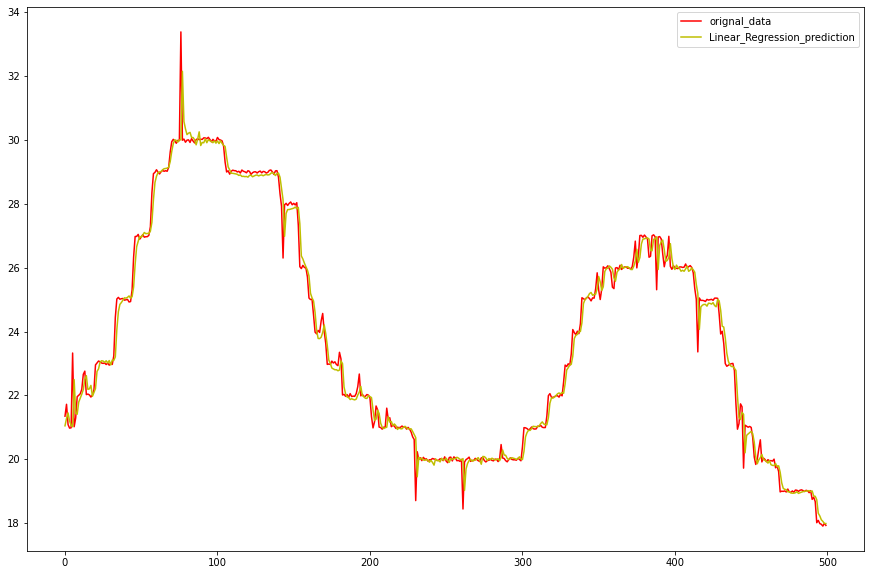

In [44]:
import matplotlib.pyplot as plt

#x=time[30:40]
fig = plt.figure(figsize=(15,10))
plt.plot(data[-500:],color="r",label="orignal_data")
#plt.plot(pre_y_list[4],color="b",label="SVR_prediction")
plt.plot(pre_y_list[1],color="y",label="Linear_Regression_prediction")
#plt.plot(xgboost_prediction,color="b",label="XGboost_prediction")
plt.legend()

plt.show()

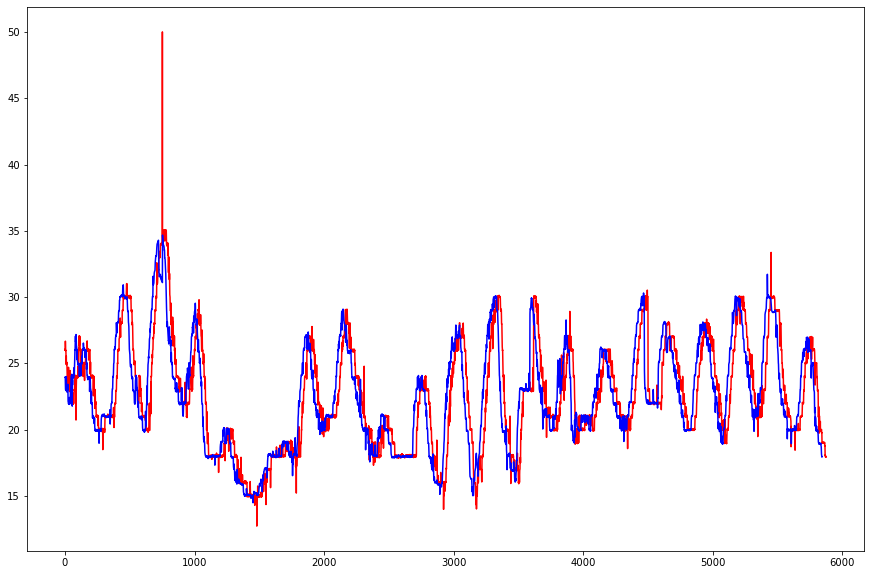

In [68]:
fig = plt.figure(figsize=(15,10))
plt.plot(data,color="r")
plt.plot(pre_y_list[3],color="b")
plt.show()